# RTSM Project - 2 : Time Series Analysis

### Flow of the Analysis : 

1. Loading all the required Libraries
2. Loading the data
3. Sanitization of the data
4. Forecasting using Simple Moving Average
5. Forecasting using Exponentially Weighted Moving Average (EWMA)
6. Forecasting with Time-Series Data (Univariate) : ARIMA | GARCH

### 1. Loading all the required Libraries

In [1]:
library(quantmod)
library(car)
library(forecast)
library(tseries)
library(FinTS)
library(rugarch)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: carData


Attaching package: ‘FinTS’


The following object is masked from ‘package:forecast’:

    Acf


Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma




### 2. Loading the data

In [3]:
# Fetching the NSE_BANK index from 01/01/2010 to 31/12/2023
getSymbols(Symbols = '^NSEBANK', 
           src = 'yahoo', 
           from = as.Date('2010-01-01'), 
           to = as.Date('2023-12-31'),
           periodicity = 'daily')

Warning message:
“^NSEBANK contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "NSEBANK"

### 3. Sanitization of the data

In [4]:
# Extract Adjusted Closing Price and Remove missing values
Index_price = na.omit(NSEBANK$NSEBANK.Adjusted)

In [5]:
# Check the class of Index_price
class(Index_price)

[1] "xts" "zoo"

In [6]:
#Viewing the sample data how it looks like
View(Index_price)

           NSEBANK.Adjusted
2010-01-04         9112.244
2010-01-05         9192.044
2010-01-06         9222.893
2010-01-07         9192.844
2010-01-08         9160.594
2010-01-11         9173.443
2010-01-12         8984.995
2010-01-13         8925.996
2010-01-14         8910.696
2010-01-15         8910.996
       ...                 
2023-12-15        48143.551
2023-12-18        47867.699
2023-12-19        47870.898
2023-12-20        47445.301
2023-12-21        47840.148
2023-12-22        47491.852
2023-12-26        47724.852
2023-12-27        48282.199
2023-12-28        48508.551
2023-12-29        48292.250

In [8]:
#Checking the structure of Index_price
str(Index_price)

An xts object on 2010-01-04 / 2023-12-29 containing: 
  Data:    double [3163, 1]
  Columns: NSEBANK.Adjusted
  Index:   Date [3163] (TZ: "UTC")
  xts Attributes:
    $ src      : chr "yahoo"
    $ updated  : POSIXct[1:1], format: "2024-03-25 00:38:10"
    $ na.action: 'omit' int [1:298] 25 353 472 493 498 503 542 594 663 672 ...
  ..- attr(*, "index")= num [1:298] 1.27e+09 1.31e+09 1.32e+09 1.32e+09 1.33e+09 ...


In [10]:
# Confirming if there are any null values in the series
any_null = any(is.null(Index_price))
any_null

[1] FALSE

In [11]:
# Confirming if there are any NA values in the series
any_na = any(is.na(Index_price))
any_na

[1] FALSE

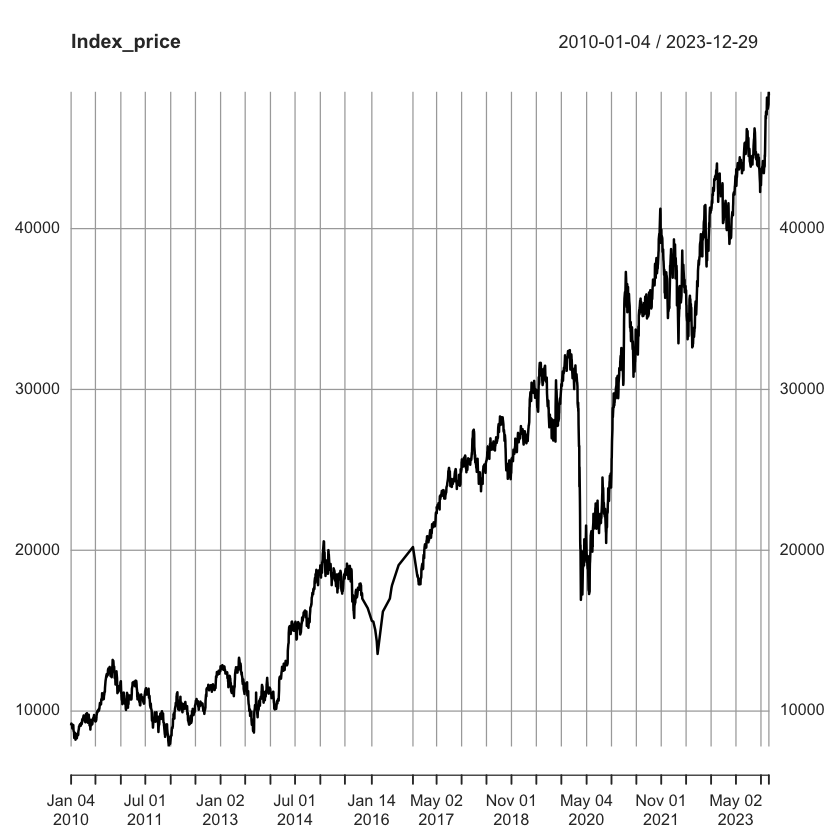

In [12]:
#Visualising the time series data 
plot(Index_price)

### 4. Forecasting using Simple Moving Average (SMA)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,7.811026e-14,340.5175,224.7821,-0.03063445,1.080029,0.9982508,0.05463362


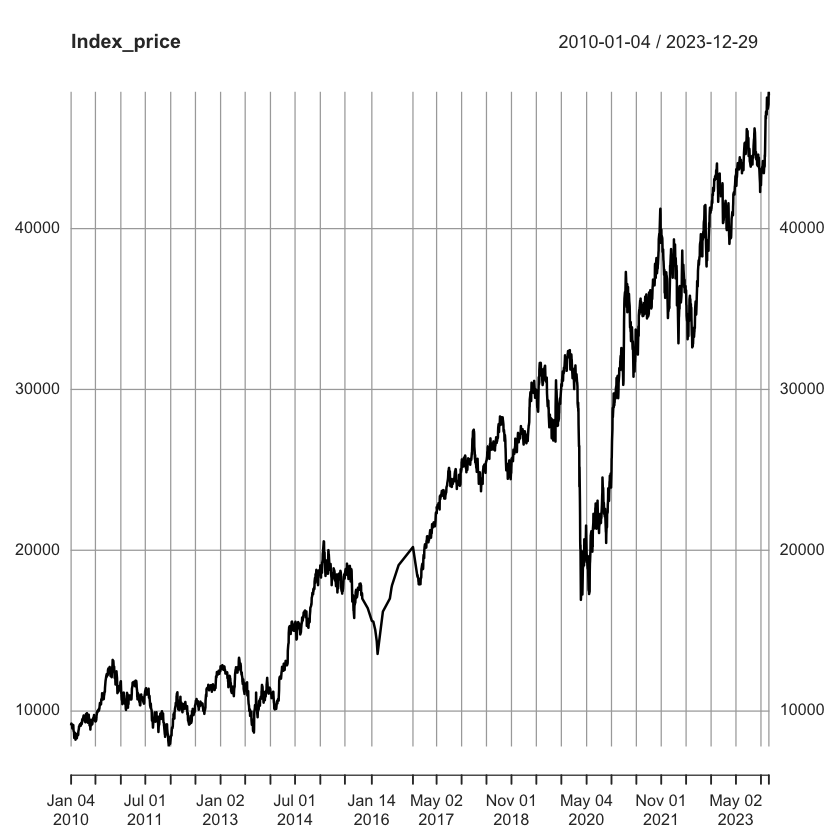

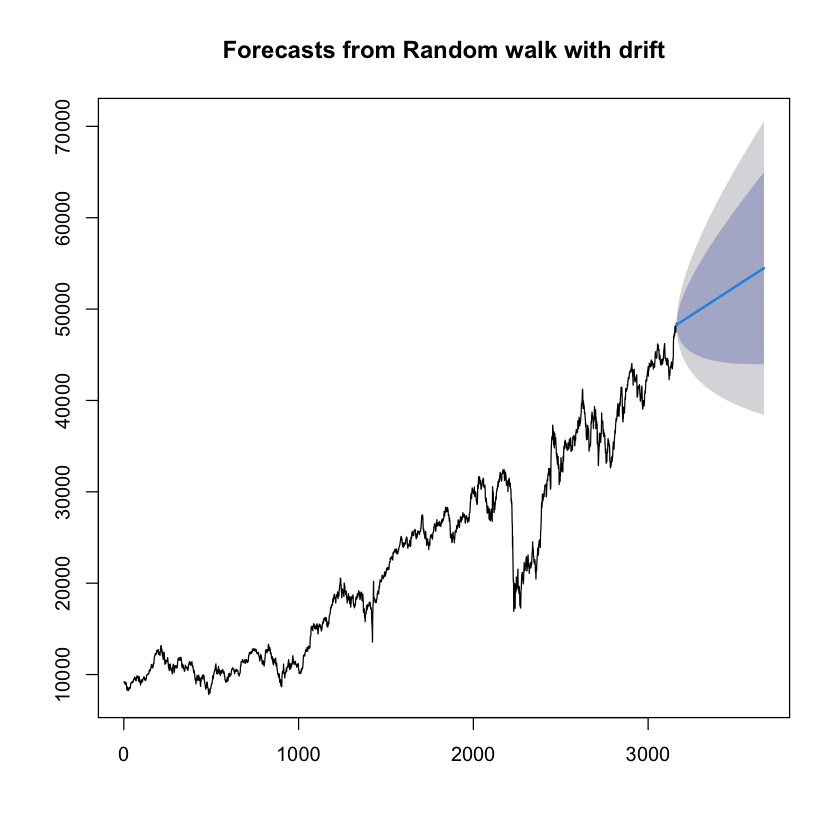

In [17]:
# Simple Moving Average [SMA]

Index_price_ma4 = ma(Index_price, order = 4) 

plot(Index_price, lwd = 2)

# Simple Moving Average : Random Walk (with Drift) Forecast
Index_price_ma8 = rwf(Index_price, h = 500, drift = TRUE) 
accuracy(Index_price_ma8)

plot(Index_price_ma8)

### 5. Forecasting using Exponentially Weighted Moving Average (EWMA)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,20.63311,379.5805,255.1953,0.0657682,1.23129,1.133315,0.4413676


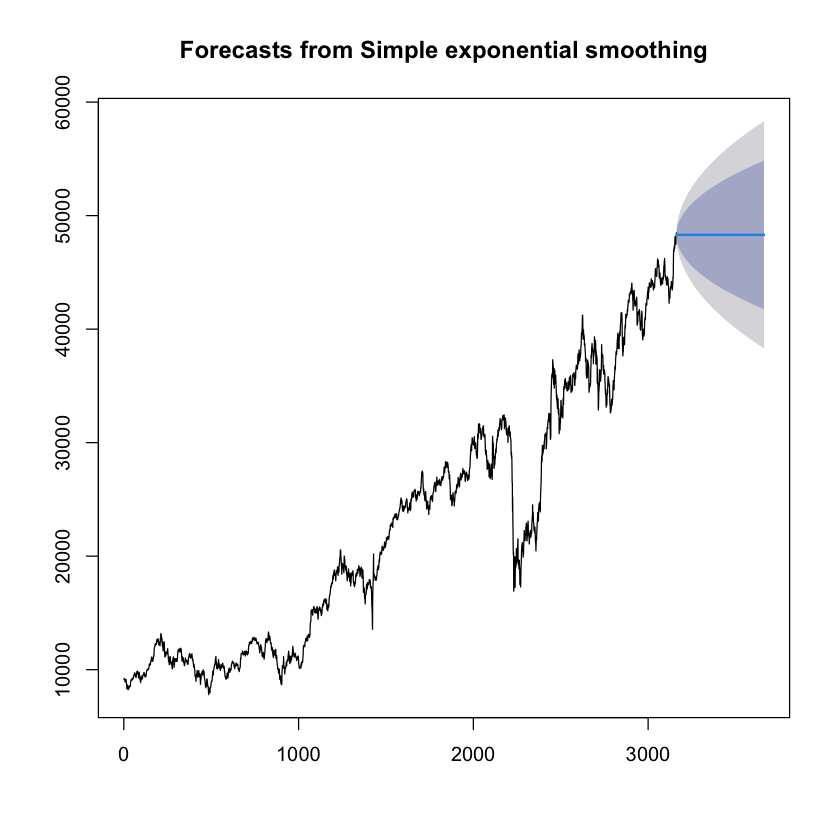

In [18]:
Index_price_es = ses(Index_price, h = 500, alpha = 0.6)
accuracy(Index_price_es)

plot(Index_price_es)

## 6. Forecasting with Time-Series Data (Univariate) : ARIMA | GARCH

### 6.1 Checking for Stationarity of the time series data

**Objective:**
To conduct an Augmented Dickey-Fuller (ADF) test for stationarity on
the daily Index price of NSE_BANK Index

**Analysis:**
Performed the ADF test using the 'adf.test' function and obtained
results.

**Result:**
The Augmented Dickey-Fuller test for stationarity on the daily Index price of NSE_BANK Index
yields the following results:
- Dickey-Fuller statistic: -2.7521
- Lag order: 14
- p-value: 0.2599
- Alternative hypothesis: Stationary


**Managerial Implication:**
The ADF test suggests that the the daily Index price of NSE_BANK Index is not stationary.
The p-value(0.2599) more than 0.05 indicates evidence for the null hypothesis of non-stationarity. Therefore, we need to transform the NSE_BANK Index time series to make it stationary

In [19]:
adf_test_Index_price = adf.test(Index_price);
adf_test_Index_price


	Augmented Dickey-Fuller Test

data:  Index_price
Dickey-Fuller = -2.7521, Lag order = 14, p-value = 0.2599
alternative hypothesis: stationary


##### Since the NSE_Index price time series data is not stationary, we take the log difference of the price data to find the returns

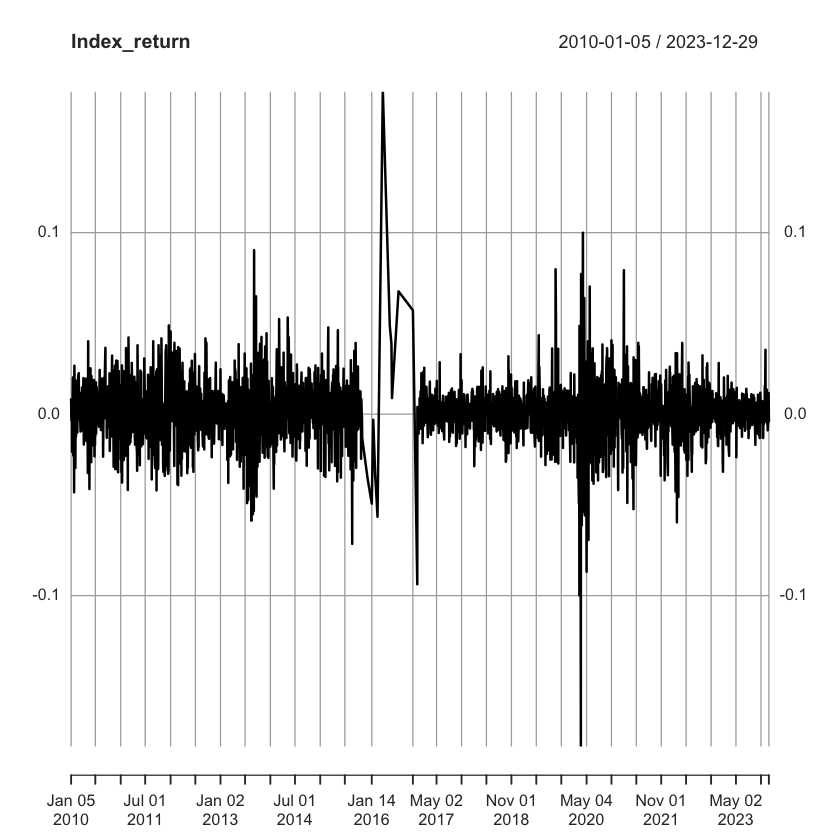

In [20]:
# finding log difference of stock price to determine returns
Index_return = na.omit(diff(log(Index_price)));
plot(Index_return)

### 6.2 Checking for Stationarity of NSE_BANK Index Returns

**Objective:**
To conduct an Augmented Dickey-Fuller (ADF) test for stationarity on the daily returns of NSE_BANK Index

**Analysis:**
Performed the ADF test using the 'adf.test' function and obtained results.

**Result:**
The Augmented Dickey-Fuller test for stationarity on the daily returns of NSE_BANK Index yields the following results:
- Dickey-Fuller statistic: -14.582
- Lag order: 14
- p-value: 0.01
- Alternative hypothesis: Stationary


**Managerial Implication:**
The ADF test suggests that the the daily returns of NSE_BANK Index is stationary.
The p-value(0.01) less than 0.05 indicates evidence against the null hypothesis of non-stationarity. Therefore, we can go ahead with the returns of NSE_BANK index for further time series analysis

In [21]:
adf_test_Index_return = adf.test(Index_return);
adf_test_Index_return

Warning message in adf.test(Index_return):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Index_return
Dickey-Fuller = -14.582, Lag order = 14, p-value = 0.01
alternative hypothesis: stationary


### 6.3 Check for Auto-Correlation in NSE_BANK returns using Ljung-Box Test 

**Objective:**
To perform a Ljung-Box test for autocorrelation on the daily returns of NSE_BANK Index

**Analysis:**
Conducted the Ljung-Box test using the 'Box.test' function and obtained results.

**Result:**
The Ljung-Box test for autocorrelation on the daily returns of NSE_BANK Index yields the following results:

- X-squared statistic: 11.431

- Degrees of freedom: 1

- p-value: = 0.0007222

**Implication:**
The Ljung-Box test indicates significant autocorrelation in the daily returns of NSE_BANK Index. The small p-value (0.0007222) suggests evidence against the null hypothesis of no autocorrelation.

**Action:**
Given the presence of autocorrelation, we can model the time series data by applying ARIMA models. In order to apply ARIMA models we need to determine appropriate lag orders P and Q. We shall find out the same in further analysis

In [22]:
lb_test_Index_return = Box.test(Index_return);
lb_test_Index_return


	Box-Pierce test

data:  Index_return
X-squared = 11.431, df = 1, p-value = 0.0007222


### 6.4 Autocorrelation Function (ACF) | Partial Autocorrelation Function (PACF)

**Objective:**<br>
To plot ACF and PACF plots and determine the appropriate lag orders for the ARIMA modelling

**Interpretation:**<br>
ACF plot shows that the spikes are dissappering after lag 1 hence appropriate value of P would be 1 <br>
PACF plot shows that the spikes are tapering off after 6 lags hence appropriate value of Q would be 6

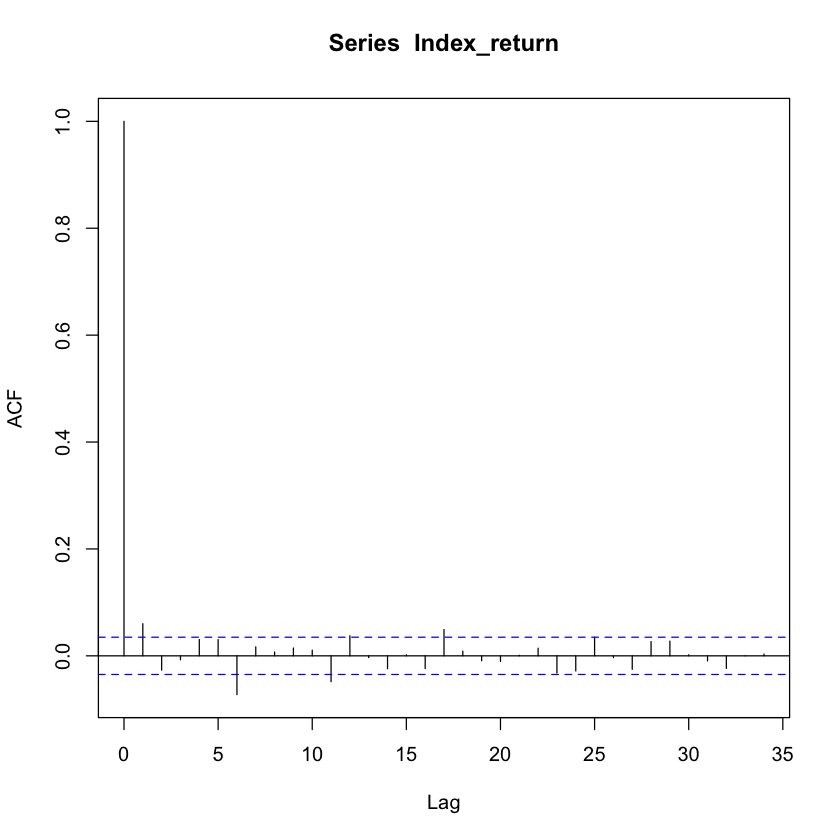

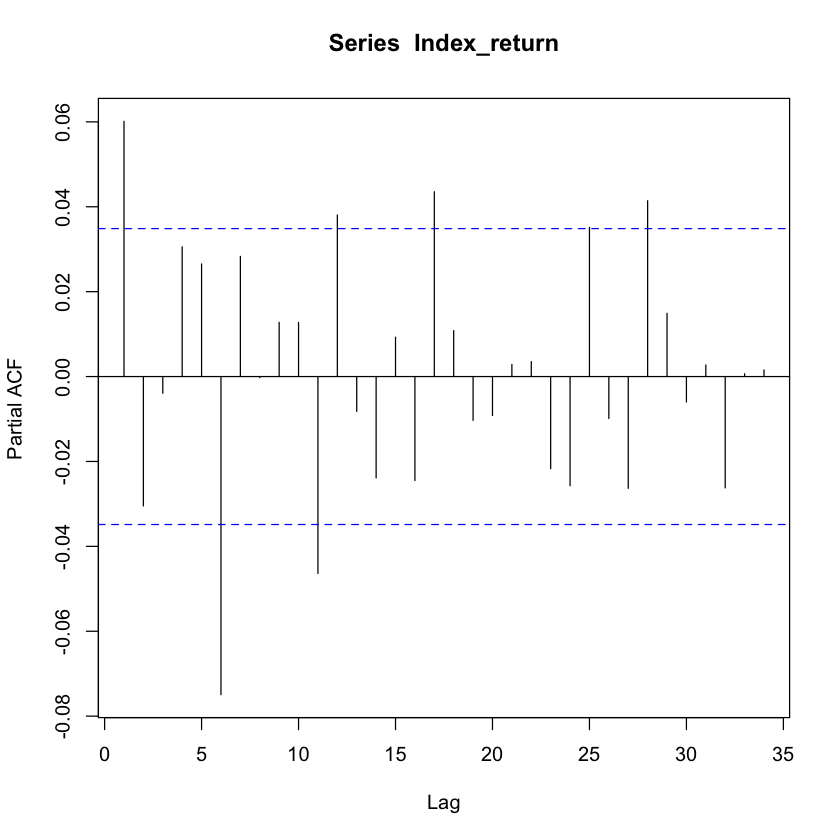

In [23]:
acf(Index_return) # ACF of Stock returns (Stationary) Series
pacf(Index_return) # PACF of Stock returns (Stationary) Series

### 6.5 ARMA modelling using AR = 1 and MA = 6

**AR (1, 0, 0) or AR1 model**

In [25]:
ar1 = arima(Index_return, order = c(1, 0, 0));
ar1


Call:
arima(x = Index_return, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.0601      5e-04
s.e.  0.0177      3e-04

sigma^2 estimated as 0.0002514:  log likelihood = 8617.15,  aic = -17228.3

**MA(0, 0, 6) or MA6 model**

In [26]:
ma6 = arima(Index_return, order = c(0, 0, 6));
ma6


Call:
arima(x = Index_return, order = c(0, 0, 6))

Coefficients:
         ma1      ma2      ma3     ma4     ma5      ma6  intercept
      0.0662  -0.0244  -0.0083  0.0286  0.0282  -0.0685      5e-04
s.e.  0.0177   0.0178   0.0177  0.0178  0.0176   0.0173      3e-04

sigma^2 estimated as 0.0002494:  log likelihood = 8629.73,  aic = -17243.47

**ARMA(1,0,6) or arma16 model**

In [27]:
arma16 = arima(Index_return, order = c(1, 0, 6));
arma16


Call:
arima(x = Index_return, order = c(1, 0, 6))

Coefficients:
          ar1     ma1      ma2      ma3     ma4     ma5      ma6  intercept
      -0.2484  0.3136  -0.0077  -0.0150  0.0281  0.0341  -0.0614      5e-04
s.e.   0.2231  0.2227   0.0241   0.0196  0.0186  0.0194   0.0203      3e-04

sigma^2 estimated as 0.0002494:  log likelihood = 8630.28,  aic = -17242.57

### 6.6 Auto ARIMA modelling

**Objective:**
To identify the appropriate ARIMA model for forecasting the daily returns of the NSE_BANK Index.

**Analysis:**
Utilized the `auto.arima()` function in R to automatically select the optimal ARIMA model for the daily returns of the NSE_BANK Index.

**Result:**
The ARIMA model selected for the daily returns of the NSE_BANK Index is ARIMA(0,0,1) with a non-zero mean.

**Coefficients:**
- MA(1): 0.0636
- Mean: 5e-04
- Standard error (s.e.): MA(1): 0.0182, Mean: 3e-04
- Residual standard error (sigma^2): 0.0002515
- Log likelihood: 8617.49
- AIC: -17228.98
- Corrected AIC (AICc): -17228.97
- BIC: -17210.8

**Managerial Implication:**
The selected ARIMA(0,0,1) model with a non-zero mean suggests that the daily returns of the NSE_BANK Index exhibit some autocorrelation in the moving average term. The small p-value and the AICc indicate a good fit for the model. This model can be utilized for forecasting the daily returns of the NSE_BANK Index efficiently.

In [28]:
arma_pq_Index_return = auto.arima(Index_return); 
arma_pq_Index_return

Series: Index_return 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1   mean
      0.0636  5e-04
s.e.  0.0182  3e-04

sigma^2 = 0.0002515:  log likelihood = 8617.49
AIC=-17228.98   AICc=-17228.97   BIC=-17210.8

### 6.7 Determining Residuals using forecasted values of Auto ARIMA model

In [30]:
Residuals = arma_pq_Index_return$residuals
head(Residuals)

A Time Series:
[1]  0.008175352  0.002303702 -0.003937415 -0.003791146  0.001115598
[6] -0.021355153

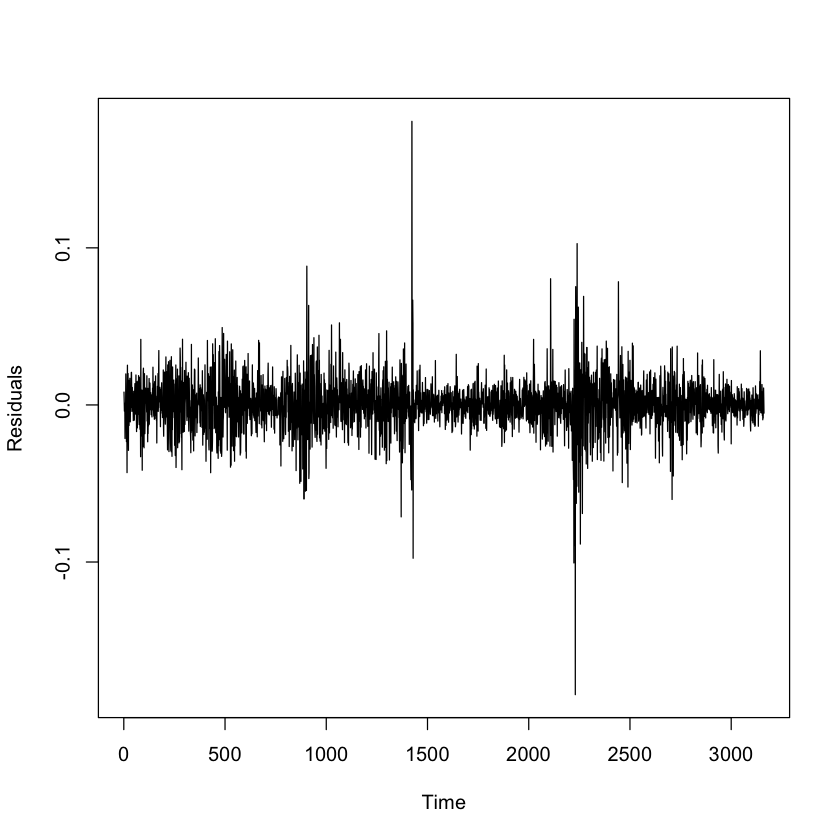

In [31]:
#Visualising the residuals data
plot(Residuals)

### 6.8 Ljung box test for presence of Autocorrelation in Residuals of ARIMA model

**Objective:**
To assess the adequacy of the selected ARIMA(0,0,1) model for forecasting the daily returns of the NSE_BANK Index through a Ljung-Box test.

**Analysis:**
Conducted the Ljung-Box test using the `Box.test()` function on the residuals of the ARIMA(0,0,1) model.

**Result:**
The Ljung-Box test results for the residuals of the ARIMA(0,0,1) model are as follows:
- Test statistic (X-squared): 0.0082275
- Degrees of freedom (df): 1
- p-value: 0.9277

**Managerial Implication:**
The Ljung-Box test p-value (0.9277) is greater than the significance level of 0.05, indicating that there is no significant autocorrelation present in the residuals of the ARIMA(0,0,1) model. Therefore, the model adequately captures the autocorrelation in the data, and its residuals are independent. This reinforces the suitability of the ARIMA(0,0,1) model for forecasting the daily returns of the NSE_BANK Index.

In [33]:
lb_test_arma_pq_Index_return = Box.test(Residuals);
lb_test_arma_pq_Index_return


	Box-Pierce test

data:  Residuals
X-squared = 0.0082275, df = 1, p-value = 0.9277


### 6.9 Forecasting using the ARIMA(0,0,1) model

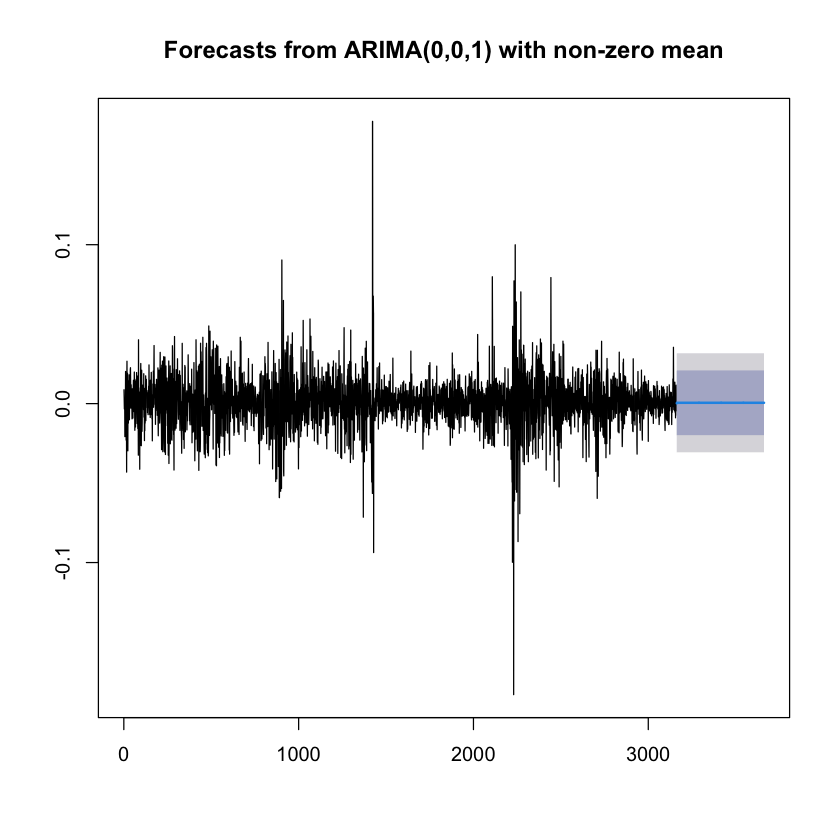

In [37]:
Index_return_fpq_50 = forecast(arma_pq_Index_return, h = 500)
plot(Index_return_fpq_50)

### Modelling for Volatility Clustering and Heteroskedasticity in Residual Square term

**Visualising the Residuals^2 term**

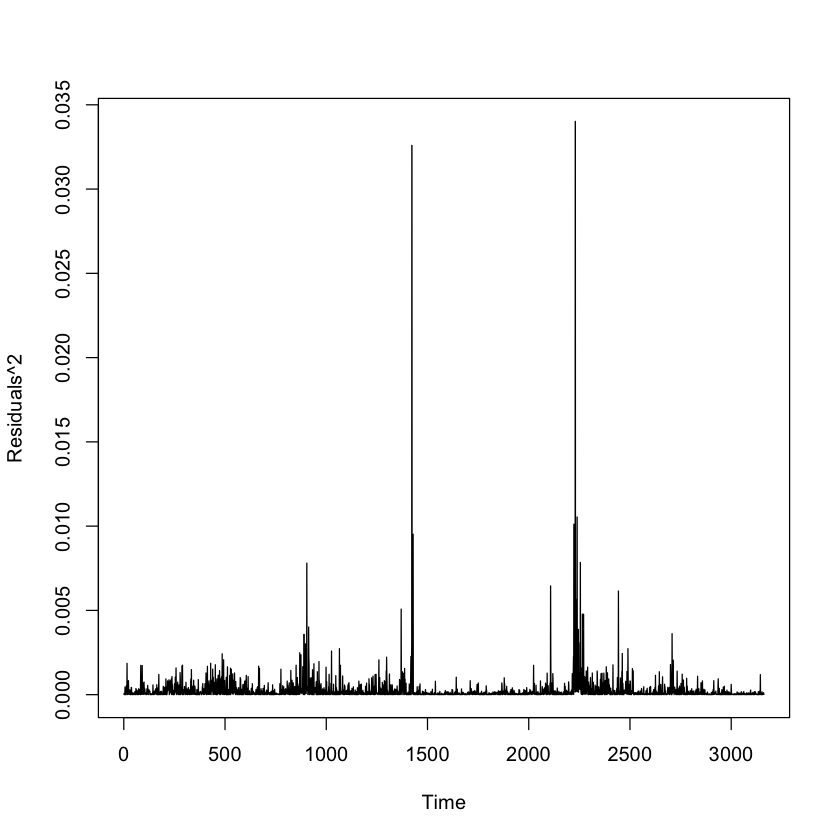

In [38]:
plot(Residuals^2)

### 6.10 Check for Autocorrelation in squared residuals of the ARIMA(0,0,1) model

**Objective:**
To assess the presence of autocorrelation in the squared residuals of the ARIMA(0,0,1) model for modeling volatility clustering and heteroskedasticity in the daily returns of the NSE_BANK Index.

**Analysis:**
Conducted a Ljung-Box test on the squared residuals of the ARIMA(0,0,1) model using the `Box.test()` function in R.

**Result:**
The Ljung-Box test was performed on the squared residuals of the ARIMA(0,0,1) model, yielding the following results:
- Test statistic (X-squared): 36.416
- Degrees of freedom (df): 1
- p-value: 1.594e-09 (very close to 0)

**Managerial Implication:**
The obtained p-value (1.594e-09) is considerably smaller than the standard significance level of 0.05, indicating substantial evidence against the null hypothesis of no autocorrelation in the squared residuals. This suggests the presence of autocorrelation in the squared residuals, implying potential volatility clustering and heteroskedasticity in the daily returns of the NSE_BANK Index. It implies that the ARIMA(0,0,1) model might not fully capture the volatility patterns, indicating a need for further refinement or alternative modeling approaches to better account for such characteristics in the data.

In [40]:
lb_test_arma_pq_Index_return_square = Box.test(Residuals^2);
lb_test_arma_pq_Index_return_square


	Box-Pierce test

data:  Residuals^2
X-squared = 36.416, df = 1, p-value = 1.594e-09


### 6.11 Check for heteroscedaticity in squared residuals of the ARIMA(0,0,1) model

**Objective:**
To investigate the presence of autoregressive conditional heteroskedasticity (ARCH) effects in the squared residuals of the ARIMA(0,0,1) model, focusing on volatility clustering in the daily returns of the NSE_BANK Index.

**Analysis:**
Conducted an ARCH LM-test using the `ArchTest()` function in R on the squared residuals of the ARIMA(0,0,1) model with a lag of 10.

**Result:**
The ARCH LM-test results for the squared residuals of the ARIMA(0,0,1) model are as follows:
- Test statistic (Chi-squared): 29.195
- Degrees of freedom (df): 10
- p-value: 0.001158

**Managerial Implication:**
The obtained p-value (0.001158) is less than the standard significance level of 0.05, providing evidence against the null hypothesis of no ARCH effects. This suggests the presence of autoregressive conditional heteroskedasticity (ARCH) in the squared residuals, indicating that volatility clustering is likely present in the daily returns of the NSE_BANK Index. It reinforces the need for modeling approaches that account for such heteroskedasticity to improve the accuracy of volatility forecasts and risk management strategies.

In [42]:
Residual_square_arch_test = ArchTest(Residuals^2, lags = 10)
Residual_square_arch_test


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  Residuals^2
Chi-squared = 29.195, df = 10, p-value = 0.001158


### 6.12 Fitting GARCH (1,1) model on squared residuals of the ARIMA(0,0,1) model

**Objective:**
To assess the presence of autocorrelation in the squared residuals of the ARIMA(0,0,1) model for modeling volatility clustering and heteroskedasticity in the daily returns of the NSE_BANK Index.

**Analysis:**
A GARCH(1,1) model was fitted to the squared residuals of the ARIMA(0,0,1) model to evaluate volatility clustering and heteroskedasticity.

**Result:**
The GARCH(1,1) model fit to the squared residuals yielded the following results:
- **Conditional Variance Dynamics:**
  - GARCH Model: sGARCH(1,1)
  - Mean Model: ARFIMA(0,0,0)
  - Distribution: Normal
- **Optimal Parameters:**
  - mu: 0.000097
  - omega: 0.000000
  - alpha1: 0.096057
  - beta1: 0.878195
- **Robust Standard Errors:**
  - Detailed estimates for mu, omega, alpha1, and beta1
- **LogLikelihood:** 19914.02
- **Information Criteria:**
  - Akaike: -12.593
  - Bayes: -12.586
  - Shibata: -12.593
  - Hannan-Quinn: -12.591

**Managerial Implication:**
The GARCH(1,1) model fitted to the squared residuals suggests that the data exhibits volatility clustering and heteroskedasticity, indicating that the variance of the daily returns of the NSE_BANK Index is not constant over time. This finding highlights the importance of accounting for such characteristics in risk management and forecasting strategies.

In [44]:
garch_model1 = ugarchspec(variance.model = list(model = 'sGARCH', garchOrder = c(1,1)), mean.model = list(armaOrder = c(0,0), include.mean = TRUE))
Residuals_square_garch1 = ugarchfit(garch_model1, data = Residuals^2);
Residuals_square_garch1


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000097    0.000005  18.16088  0.00000
omega   0.000000    0.000000   0.02922  0.97669
alpha1  0.096057    0.002953  32.52516  0.00000
beta1   0.878195    0.003546 247.66739  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000097    0.004080 0.023694  0.98110
omega   0.000000    0.000568 0.000007  0.99999
alpha1  0.096057    0.412618 0.232799  0.81592
beta1   0.878195    6.399318 0.137233  0.89085

LogLikelihood : 19914.02 

Information Criteria
------------------------------------
                    
Akaike       -12.593
Bayes        -12.586
Shibata      -12.593
Hannan-Quinn -12.591


### 6.13 Checking for heteroskedasticity in the Residuals of GARCH (1,1) model fitted on squared residuals of the ARIMA(0,0,1) model

In [78]:
class(Residuals_square_garch1)

[1] "uGARCHfit"
attr(,"package")
[1] "rugarch"

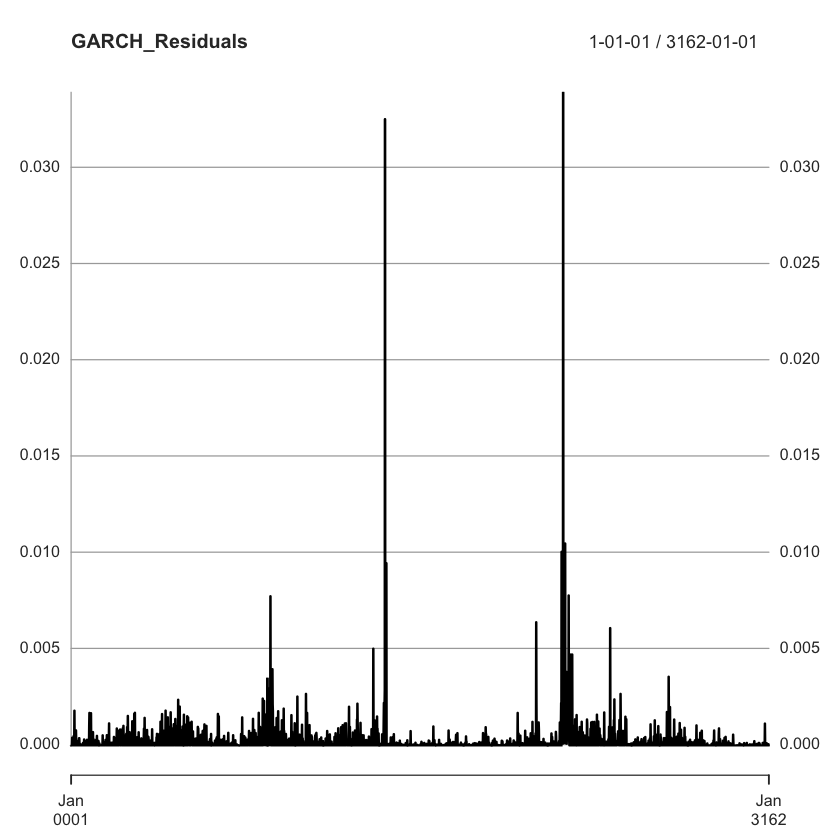

In [48]:
GARCH_Residuals = residuals(Residuals_square_garch1)
plot(GARCH_Residuals)

**Objective:**
To examine the presence of autoregressive conditional heteroskedasticity (ARCH) effects in the residuals of the GARCH(1,1) model applied to the squared residuals of the ARIMA(0,0,1) model, focusing on volatility clustering in the daily returns of the NSE_BANK Index.

**Analysis:**
Conducted an ARCH LM-test using the `ArchTest()` function in R on the residuals of the GARCH(1,1) model with a lag of 20.

**Result:**
The ARCH LM-test results for the residuals of the GARCH(1,1) model are as follows:
- Test statistic (Chi-squared): 28.356
- Degrees of freedom (df): 20
- p-value: 0.1012

**Managerial Implication:**
The obtained p-value (0.1012) is greater than the standard significance level of 0.05, indicating weak evidence against the null hypothesis of no ARCH effects. This suggests that there may not be significant autocorrelation present in the residuals of the GARCH(1,1) model. Hence, GARCH(1,1) model can be fit on the original Stationary series in question

In [49]:
GARCH_Residuals_square_arch_test = ArchTest(GARCH_Residuals, lags = 20)
GARCH_Residuals_square_arch_test


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  GARCH_Residuals
Chi-squared = 28.356, df = 20, p-value = 0.1012


### 6.14 Fitting GARCH(1,1) model along with ARIMA (0,0,1) model including mean on NSE_BANK Index return series

**Objective:**
To fit a GARCH(1,1) model to the stock return data for the NSE_BANK Index, aiming to model volatility clustering and heteroskedasticity.

**Analysis:**
A GARCH(1,1) model was specified and fitted to the stock return data using the `ugarchspec()` and `ugarchfit()` functions in R.

**Result:**
The GARCH(1,1) model fit to the stock return data yielded the following results:
- **Conditional Variance Dynamics:**
  - GARCH Model: sGARCH(1,1)
  - Mean Model: ARFIMA(0,0,1)
  - Distribution: Normal
- **Optimal Parameters:**
  - mu: 0.000995
  - ma1: 0.075394
  - omega: 0.000004
  - alpha1: 0.112615
  - beta1: 0.876951
- **Robust Standard Errors:**
  - Detailed estimates for mu, ma1, omega, alpha1, and beta1
- **LogLikelihood:** 9135.464
- **Information Criteria:**
  - Akaike: -5.7751
  - Bayes: -5.7655
  - Shibata: -5.7751
  - Hannan-Quinn: -5.7717

**Managerial Implication:**
The GARCH(1,1) model adequately captures the volatility clustering and heteroskedasticity present in the stock return data for the NSE_BANK Index. The model's performance is supported by various diagnostic tests, suggesting its suitability for forecasting volatility and managing risk associated with the NSE_BANK Index.

In [50]:
garch_model_stock_return = ugarchspec(variance.model = list(model = 'sGARCH', garchOrder = c(1,1)), mean.model = list(armaOrder = c(0,1), include.mean = TRUE))
Index_return_Garch_model_1 = ugarchfit(garch_model_stock_return, data = Index_return);
Index_return_Garch_model_1


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000995    0.000222   4.4752 0.000008
ma1     0.075394    0.019665   3.8340 0.000126
omega   0.000004    0.000002   2.4626 0.013793
alpha1  0.112615    0.010851  10.3782 0.000000
beta1   0.876951    0.011488  76.3337 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000995    0.000230  4.32516 0.000015
ma1     0.075394    0.019450  3.87635 0.000106
omega   0.000004    0.000005  0.78003 0.435375
alpha1  0.112615    0.024790  4.54279 0.000006
beta1   0.876951    0.030051 29.18188 0.000000

LogLikelihood : 9135.464 

Information Criteria
------------------------------------
                

### 6.15 Forecasting using the GARCH(1,1) model

In [57]:
nse_ret_garch_forecast = ugarchforecast(Index_return_Garch_model_1, n.ahead = 100);
View(nse_ret_garch_forecast)


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 100
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2023-12-29]:
         Series    Sigma
T+1   0.0005664 0.009323
T+2   0.0009948 0.009474
T+3   0.0009948 0.009621
T+4   0.0009948 0.009764
T+5   0.0009948 0.009904
T+6   0.0009948 0.010040
T+7   0.0009948 0.010173
T+8   0.0009948 0.010303
T+9   0.0009948 0.010430
T+10  0.0009948 0.010554
T+11  0.0009948 0.010675
T+12  0.0009948 0.010794
T+13  0.0009948 0.010911
T+14  0.0009948 0.011024
T+15  0.0009948 0.011136
T+16  0.0009948 0.011245
T+17  0.0009948 0.011352
T+18  0.0009948 0.011457
T+19  0.0009948 0.011560
T+20  0.0009948 0.011661
T+21  0.0009948 0.011761
T+22  0.0009948 0.011858
T+23  0.0009948 0.011953
T+24  0.0009948 0.012047
T+25  0.0009948 0.012139
T+26  0.0009948 0.012229
T+27  0.0009948 0.012318
T+28  0.0009948 0.012405
T+29  0.0009948 0.012491
T+30  0.0009948 0.012575
T+31  0.0009948